### 4Q1 Simple Linear Regression 
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model.

Delivery_time -> Predict delivery time using sorting time.

use delivery_time.csv

In [27]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [28]:
delivery=pd.read_csv("C:\\Users\\SARAN\\Desktop\\excelr\\DS\\Assignments\\simple linear regression\\deliverytime.csv")
delivery.shape

(21, 2)

In [29]:
delivery.info()
delivery.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [31]:
delivery['sorting_time']= delivery['sorting_time'].astype(float)
delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'}, inplace=True, axis=1 )
delivery.head()

,delivery_time,sorting_time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0


In [6]:
#correlation analysis
delivery.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.825997
sortingtime,0.825997,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

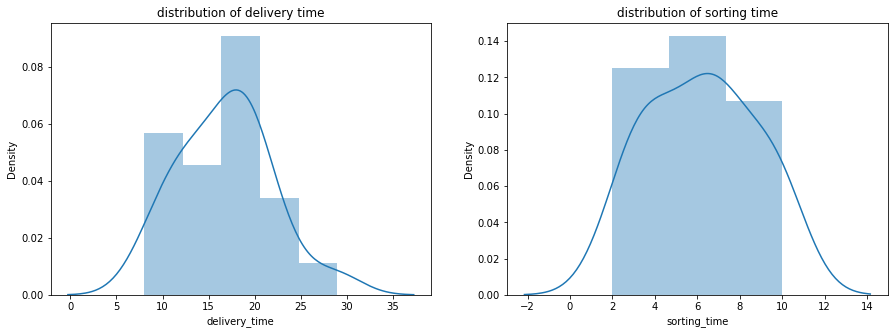

In [53]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(delivery['delivery_time'], ax=axes[0])
axes[0].set_title("distribution of delivery time")

sns.distplot(delivery['sorting_time'], ax=axes[1])
axes[1].set_title("distribution of sorting time")

plt.show

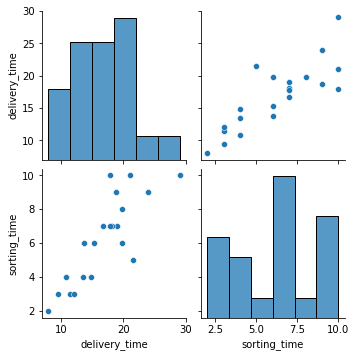

In [56]:
sns.pairplot(delivery) #There is good linear relation.

In [61]:
model=smf.ols("delivery_time~sorting_time",data=delivery).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

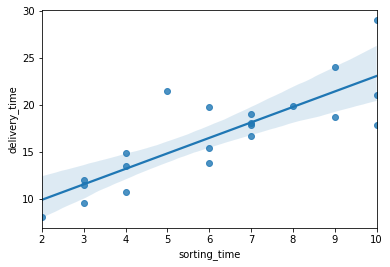

In [55]:
sns.regplot(x='sorting_time', y='delivery_time', data=delivery)

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        13:13:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [59]:
print(model.tvalues,'\n', model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [60]:
print(model.rsquared, model.rsquared_adj)

0.6822714748417231 0.6655489208860244


## predictions

In [66]:
newdata=pd.Series([2.5,8.5])
dataframe1=pd.DataFrame(newdata,columns=['sorting_time'])
model.predict(dataframe1)

0    10.705284
1    20.599403
dtype: float64

### Outlier examination

<function matplotlib.pyplot.show(close=None, block=None)>

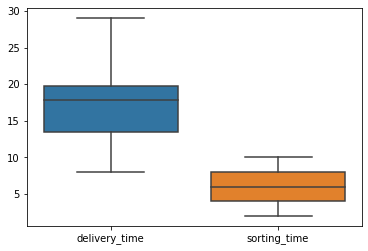

In [76]:
sns.boxplot(data=delivery) #There are no extreme outliers in this case. )
plt.show